# Loading Data

Let's upload the titanic.csv file to Google Drive first and run the following cells :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/COM738/titanic.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

## Checking dataset information

1. Basic Information

2. Shape (Rows and Columns)

In [5]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 891
Number of columns: 12


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3. Summary Statistics

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Handling Missing Data

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


**Counting missing values per column**

In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Understanding data about different columns

<ipython-input-10-c817c41b158e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = df, palette='pastel')


<Axes: xlabel='Survived', ylabel='count'>

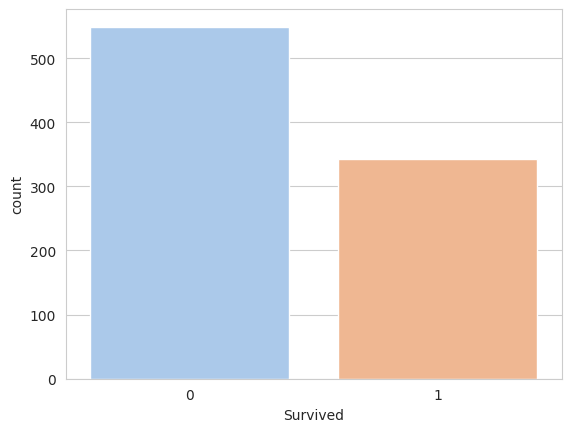

In [10]:
# Survived column
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df, palette='pastel')

From the above graph, we can see the less people could survive in the given dataset.

Exploring survival based on sex :

<Axes: xlabel='Survived', ylabel='count'>

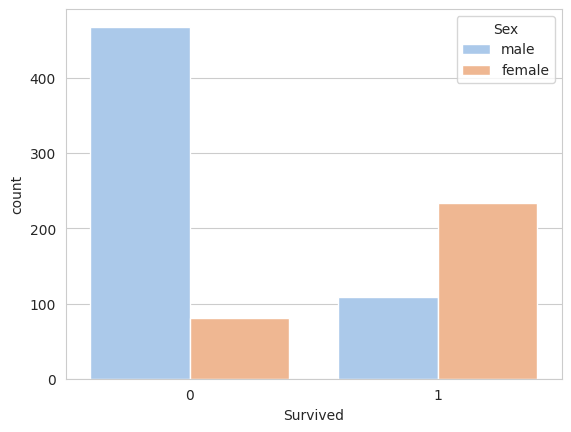

In [11]:
# Survival about Sex column
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette='pastel')

In [12]:
sex_survival = pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: r/r.sum(), axis=1)
print(sex_survival*100.0)

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


From the above graph, it is visible that:
among the people who could not survive, the number of male candidates were more than that of females.

Conversely, among the people who survived, the number of females were more than that of males.

In a nutshell, female passengers have more probability to survive.

Exploring survival based on Pclass :  

<Axes: xlabel='Survived', ylabel='count'>

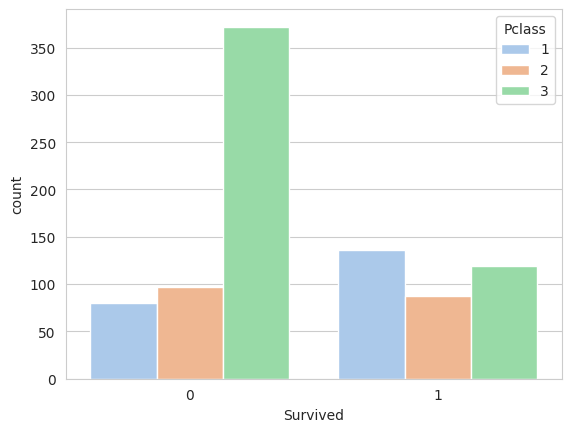

In [13]:
# Survival about Pclass column
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette='pastel')

In [14]:
Pclass_survival = pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: r/r.sum(), axis=1)
print(Pclass_survival*100.0)

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


There are three categories in the column Pclass : class 1, class 2 and class 3.

It is visible that more people from class 3 failed to survive whereas more people from class 1 survived.

Therefore, passengers of class 1 are at maximum probability of surviving.

The Embarked class denotes the port of embarkation of the passengers:

C = Cherbourg, Q = Queenstown, S = Southampton.

In [15]:
# Embarked column
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


644 out of 891 passengers, i.e., maximum passengers were heading towards Southampton.

<Axes: xlabel='Survived', ylabel='count'>

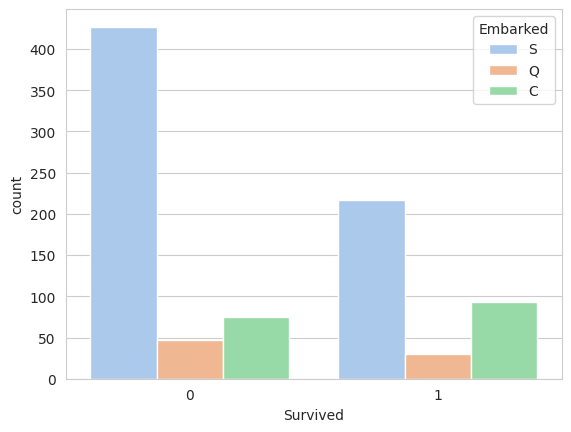

In [16]:
# Survival with Embarked column
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Embarked', data = df, palette='pastel')

In [17]:
embarked_survival = pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: r/r.sum(), axis=1)
print(embarked_survival*100.0)

Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


It seems passengers headed towards Cherbourg had better chance of survival.

Let's explore the age demographics in the Titanic dataset! Following is a histogram depicting the distribution of passenger's ages :

<Axes: xlabel='Age', ylabel='Count'>

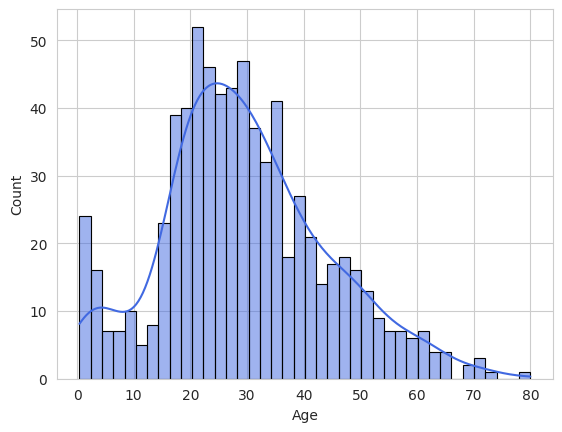

In [18]:
# Age column
sns.histplot(df['Age'].dropna(), bins=40, color='royalblue', edgecolor='black', kde = True)

Let's explore the distribution of passengers based on family members aboard:

The SibSp class denotes Siblings/Spouses Aboard, i.e., how many siblings or spouses a passenger had on board.

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

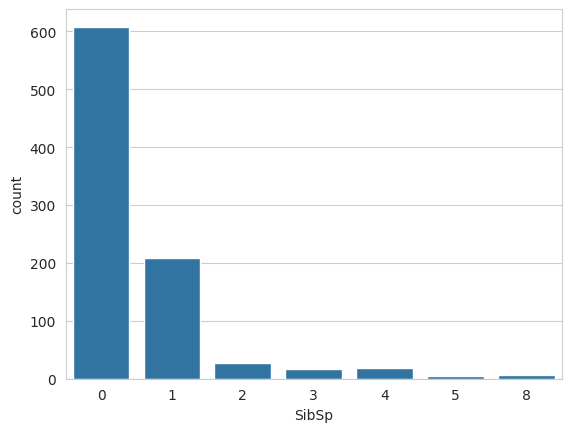

In [19]:
# SibSp column

print(df['SibSp'].value_counts())
sns.countplot(x='SibSp',data=df)

It is visible that, maximum people(precisely, 608 among 891) were travelling alone.

<Axes: xlabel='Survived', ylabel='count'>

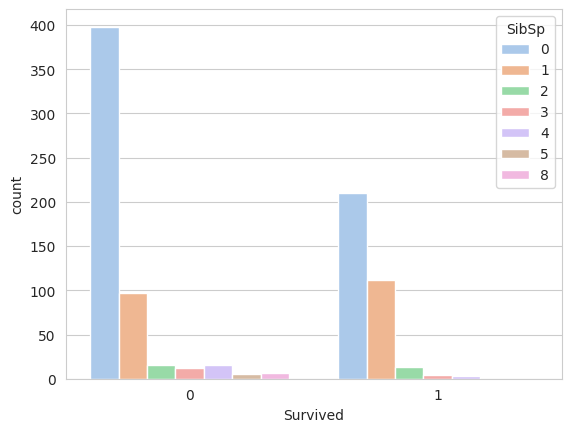

In [20]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'SibSp', data = df, palette='pastel')

In [21]:
SibSp_survival = pd.crosstab(df['SibSp'], df['Survived']).apply(lambda r: r/r.sum(), axis=1)
print(SibSp_survival*100.0)

Survived           0          1
SibSp                          
0          65.460526  34.539474
1          46.411483  53.588517
2          53.571429  46.428571
3          75.000000  25.000000
4          83.333333  16.666667
5         100.000000   0.000000
8         100.000000   0.000000


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch', ylabel='count'>

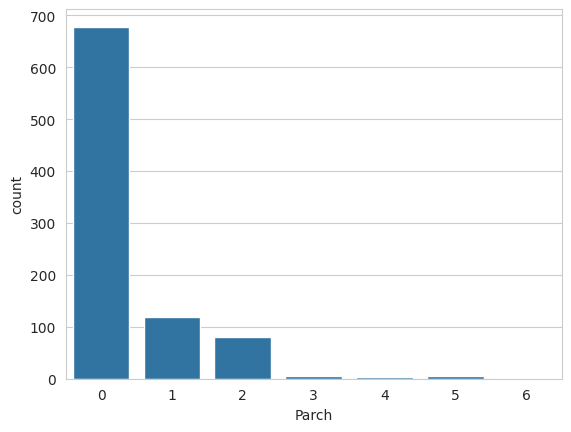

In [22]:
# Parch column

print(df['Parch'].value_counts())
sns.countplot(x='Parch',data=df)

The Parch class denotes the number of parents/children aboard the Titanic.

It is visible that, even in this case also, maximum passengers ( precisely, 678 people out of 891 total passengers) were travelling alone with no parent or child.

<Axes: xlabel='Survived', ylabel='count'>

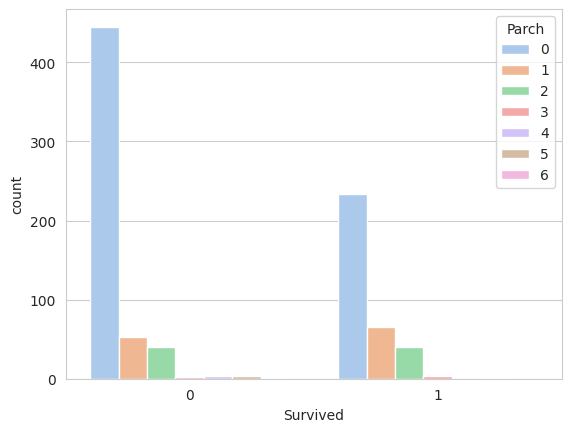

In [23]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Parch', data = df, palette='pastel')

In [24]:
Parch_survival = pd.crosstab(df['Parch'], df['Survived']).apply(lambda r: r/r.sum(), axis=1)
print(Parch_survival*100.0)

Survived           0          1
Parch                          
0          65.634218  34.365782
1          44.915254  55.084746
2          50.000000  50.000000
3          40.000000  60.000000
4         100.000000   0.000000
5          80.000000  20.000000
6         100.000000   0.000000


<Axes: xlabel='Fare', ylabel='Count'>

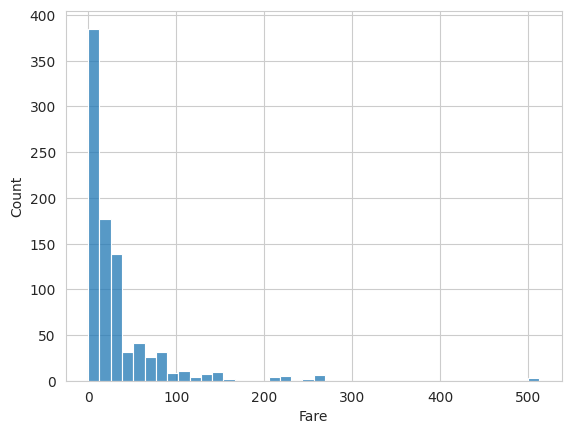

In [25]:
# Fare column
sns.histplot(x='Fare', data = df, bins = 40)

# Data Cleaning

In the "Handling Missing Value" section, we had seen that, age column has 177, Cabin column has 687 and embarked has 2 missing values.

Let's handle the missing values for age column and for that we will impute values instead of dropping since dropping will reduce a lot of useful values.

In order to impute, let's check if there is any relation between Age and Pclass column:

<ipython-input-26-b4c1a2924e5b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'pastel')


<Axes: xlabel='Pclass', ylabel='Age'>

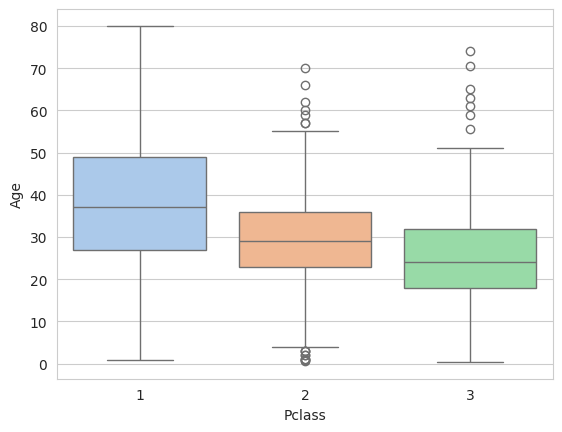

In [26]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'pastel')

From the boxplot, we can infer that, first-class passengers are older than the other two classes. In fact, the higher the class, i.e., wealthier passengers seem to be older.

Let's use the average age values to impute based on Pclass for Age:


In [27]:
mean_ages = df.groupby('Pclass')['Age'].mean()
print(mean_ages)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [28]:
def handle_missing_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38.233441
        elif Pclass == 2:
            return 29.877630
        else:
            return 25.140620
    else:
        return Age

In [29]:
df['Age'] = df[['Age','Pclass']].apply(handle_missing_age,axis=1)

<ipython-input-28-8d06b57a0a63>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-28-8d06b57a0a63>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [30]:
print(df['Age'].isnull().sum())

0


Thus, we have cleaned the age column successfully!

Now, let's drop the Cabin column(since most of the values in this column is missing, so it will not be that useful for us to get any insight) and embarked column(since only 2 missing values, so dropping it will not impact much).

In [31]:
df.drop('Cabin', axis=1, inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Thus, Cabin column is dropped!

In [33]:
# Cleaning Embarked column
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Converting Categorical Features

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [36]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [37]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [38]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
df = pd.concat([df,sex,embark],axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
df.to_csv('cleaned_titanic.csv', index=False)
